# **Prédiction de solvabilité d’un client d'une Banque**

### Liste de variables

     VarA = Incident_r_r :(qualitative)
     VarE = Motif_pret : (qualitative)
     VarF = Profession : (qualitative)
     VarB = Montant_pret
     VarC = Montant_hypotheque
     VarD = Val_propriete
     VarG = Nb_annees_travail
     VarH = Nb_report_pret
     VarI = Nb_litiges
     VarJ = Age_cred
     Vark = Nb_demandes_cred
     VarL = Ratio_dette_revenu

Chargement des librairies

In [3]:
import os
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

from os import chdir
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

**1. Chargement des données**

In [7]:
# Chemin du répertoire courant (où se trouve le notebook)
current_dir = os.getcwd()

# Chemin du dossier "data" relatif au répertoire courant
data_dir = os.path.join(current_dir, '_data')

# Vous pouvez maintenant utiliser data_dir pour accéder aux fichiers dans le dossier "data"
# Par exemple, pour lire un fichier CSV :
pd.set_option('display.max_column', 12)
data_file = os.path.join(data_dir, 'Tab2.sas7bdat')
dfp = pd.read_sas(data_file)
dfp

,varA,varB,varC,varD,varE,varF,varG,varH,varI,varJ,varK,varL
0,1.0,1300.0,70053.0,68400.0,b'HomeImp',b'Other',7.0,0.0,2.0,121.83,0.0,NaN
1,1.0,1500.0,13500.0,16700.0,b'HomeImp',b'Other',4.0,0.0,0.0,149.47,1.0,NaN
2,0.0,1700.0,97800.0,112000.0,b'HomeImp',b'Office',3.0,0.0,0.0,93.33,0.0,NaN
3,1.0,1700.0,30548.0,40320.0,b'HomeImp',b'Other',9.0,0.0,0.0,101.47,1.0,37.114
4,1.0,1800.0,48649.0,57037.0,b'HomeImp',b'Other',5.0,3.0,2.0,77.10,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3569,0.0,88300.0,54004.0,94838.0,b'DebtCon',b'Other',16.0,0.0,0.0,193.70,0.0,36.263
3570,0.0,88800.0,53307.0,94058.0,b'DebtCon',b'Other',16.0,0.0,0.0,218.30,0.0,34.242
3571,0.0,88900.0,48919.0,93371.0,b'DebtCon',b'Other',15.0,0.0,1.0,205.65,0.0,34.818
3572,0.0,89000.0,54576.0,92937.0,b'DebtCon',b'Other',16.0,0.0,0.0,208.69,0.0,35.860


**2. Renommage des variables**

In [11]:
dfp.rename(columns={'varA': 'Incident_r', 'varB': 'Montant_pret', 'varC': 'Montant_hypotheque',
'varD': 'Val_propriete','varE': 'Motif_pret','varF': 'Profession',
'varG': 'Nb_annees_travail','varH': 'Nb_report_pret', 'varI': 'Nb_litiges',
'varJ': 'Age_cred','varK': 'Nb_demandes_cred','varL': 'Ratio_dette_revenu'}, inplace=True)
print(dfp.head())

   Incident_r  Montant_pret  Montant_hypotheque  Val_propriete  Motif_pret  \
0         1.0        1300.0             70053.0        68400.0  b'HomeImp'   
1         1.0        1500.0             13500.0        16700.0  b'HomeImp'   
2         0.0        1700.0             97800.0       112000.0  b'HomeImp'   
3         1.0        1700.0             30548.0        40320.0  b'HomeImp'   
4         1.0        1800.0             48649.0        57037.0  b'HomeImp'   

  Profession  Nb_annees_travail  Nb_report_pret  Nb_litiges  Age_cred  \
0   b'Other'                7.0             0.0         2.0    121.83   
1   b'Other'                4.0             0.0         0.0    149.47   
2  b'Office'                3.0             0.0         0.0     93.33   
3   b'Other'                9.0             0.0         0.0    101.47   
4   b'Other'                5.0             3.0         2.0     77.10   

   Nb_demandes_cred  Ratio_dette_revenu  
0               0.0                 NaN  
1       

**3. Statitiques descriptives**

In [20]:
print(' Aperçu des données')
print(f'\nDimensions du dataset : {dfp.shape}')
print(f'\nTypes des variables :')
print(dfp.dtypes)

print('\n Variable cible')
print('\nRépartition de la variable Incident_r :')
print(dfp["Incident_r"].value_counts(dropna=False))

print('\n Exploration des variables explicatives')

print('\n Variables qualitatives')
print('\nFréquences des modalités :')
for col in dfp.select_dtypes('object'):
    print(f'\n{col:<30}')
    print(dfp[col].value_counts(dropna=False))

print('\n Variables quantitatives')
print('\nStatistiques descriptives :')
print(dfp.describe(include="all"))

print('\nConversion de l\'âge en années :')
dfp['Age_cred'] = round(dfp['Age_cred'] / 12, 2)
print(dfp['Age_cred'].head())

 Aperçu des données

Dimensions du dataset : (3574, 12)

Types des variables :
Incident_r            float64
Montant_pret          float64
Montant_hypotheque    float64
Val_propriete         float64
Motif_pret             object
Profession             object
Nb_annees_travail     float64
Nb_report_pret        float64
Nb_litiges            float64
Age_cred              float64
Nb_demandes_cred      float64
Ratio_dette_revenu    float64
dtype: object

 Variable cible

Répartition de la variable Incident_r :
0.0    2844
1.0     730
Name: Incident_r, dtype: int64

 Exploration des variables explicatives

 Variables qualitatives

Fréquences des modalités :

Motif_pret                    
b'DebtCon'    2350
b'HomeImp'    1061
NaN            163
Name: Motif_pret, dtype: int64

Profession                    
b'Other'     1408
b'ProfEx'     768
b'Office'     575
b'Mgr'        476
NaN           168
b'Self'       110
b'Sales'       69
Name: Profession, dtype: int64

 Variables quantitatives

Stat

Motif_pret-------------------- [b'HomeImp' nan b'DebtCon']
Profession-------------------- [b'Other' b'Office' b'Sales' b'Mgr' nan b'ProfEx' b'Self']


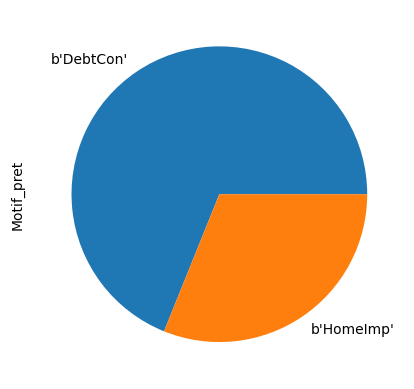

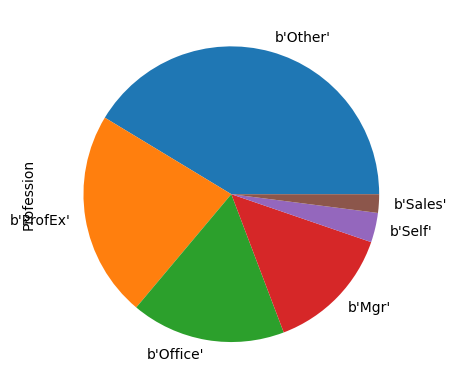

In [17]:
dfp.describe(include="all")

# variables qualitatives (Calcul des fréquences des modalités)
for col in dfp.select_dtypes('object'):
    print(f'{col :-<30} {dfp[col].unique()}')

for col in dfp.select_dtypes('object'):
    plt.figure()
    dfp[col].value_counts().plot.pie()